<a href="https://colab.research.google.com/github/mohsina680/BuildablesDataScienceFellowship/blob/main/Deep_learning_project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("Libraries imported successfully!")

TensorFlow version: 2.19.0
Libraries imported successfully!


In [14]:

# Load the MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display basic information about the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")

Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Pixel value range: 0 to 255


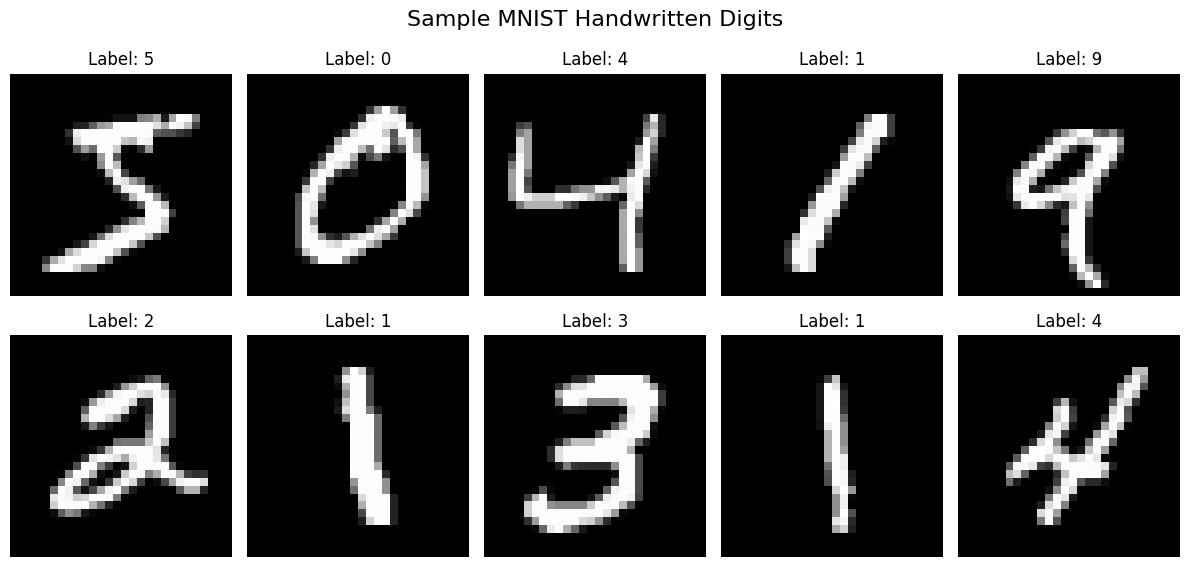

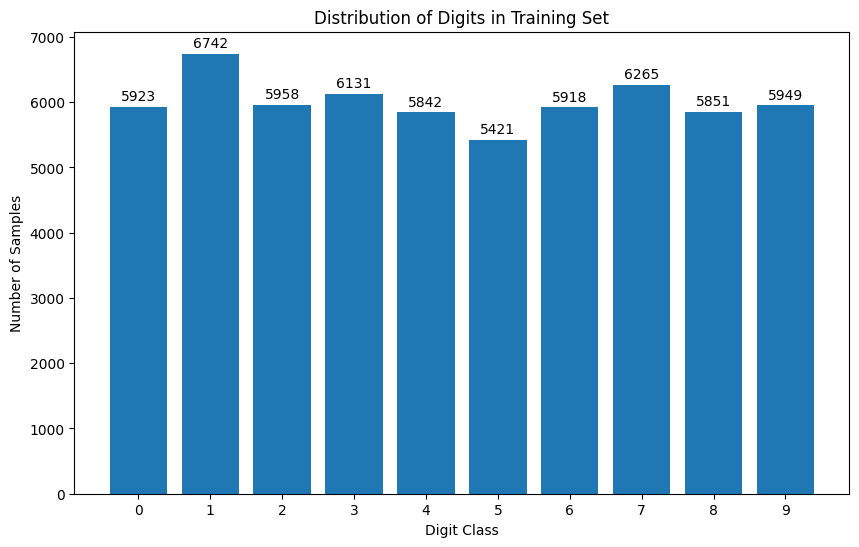

In [4]:

# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Handwritten Digits', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.xticks(unique)
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center')
plt.show()

In [5]:

# Data Preprocessing
print("Preprocessing data...")

# Normalize pixel values to range [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Reshape data to flatten images (28x28 -> 784)
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], 784)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], 784)

# Convert labels to categorical (one-hot encoding)
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print("Data preprocessing completed!")
print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"Categorical training labels shape: {y_train_categorical.shape}")
print(f"Sample normalized pixel values: {x_train_flat[0][:10]}")

Preprocessing data...
Data preprocessing completed!
Flattened training data shape: (60000, 784)
Categorical training labels shape: (60000, 10)
Sample normalized pixel values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Building the neural network model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

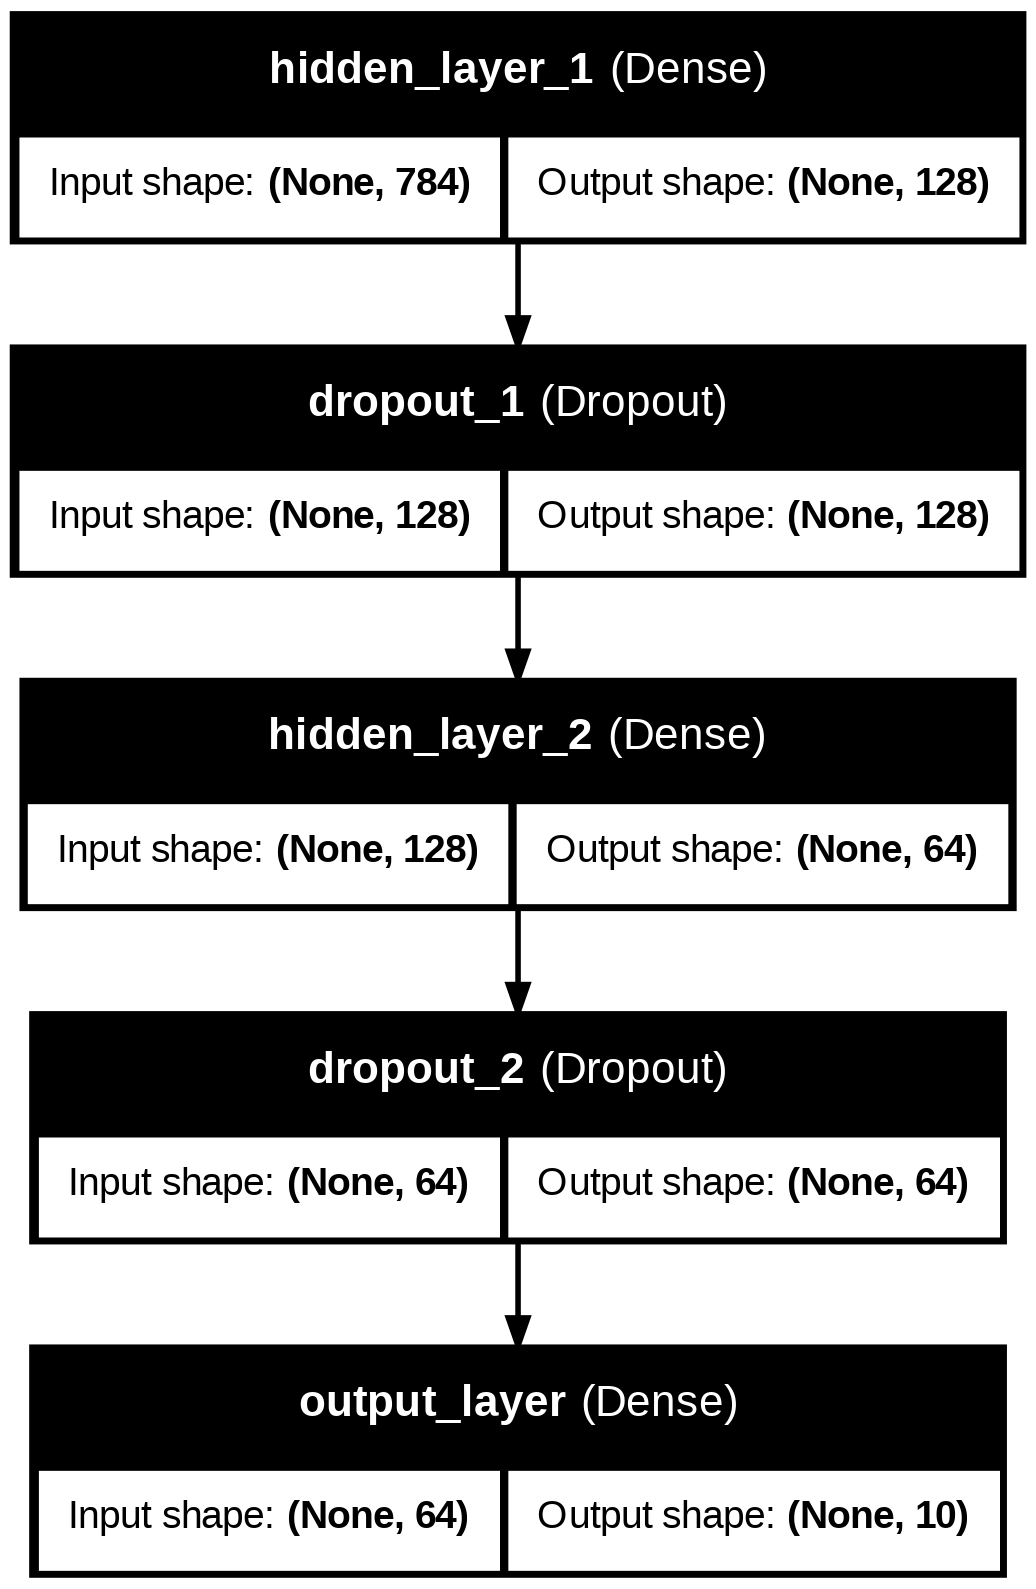

In [6]:

# Design the Artificial Neural Network (ANN) Architecture
print("Building the neural network model...")

model = keras.Sequential([
    # Input layer (implicitly defined by input_shape)
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden_layer_1'),
    layers.Dropout(0.2, name='dropout_1'),

    # Second hidden layer
    layers.Dense(64, activation='relu', name='hidden_layer_2'),
    layers.Dropout(0.2, name='dropout_2'),

    # Output layer
    layers.Dense(10, activation='softmax', name='output_layer')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
print("Model Architecture:")
model.summary()

# Visualize model architecture
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, rankdir='TB')

In [7]:

# Train the Neural Network
print("Starting model training...")

# Define training parameters
batch_size = 128
epochs = 15
validation_split = 0.1

# Train the model
history = model.fit(
    x_train_flat, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    verbose=1,
    shuffle=True
)

print("Training completed!")

Starting model training...
Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7438 - loss: 0.8235 - val_accuracy: 0.9580 - val_loss: 0.1511
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9323 - loss: 0.2298 - val_accuracy: 0.9687 - val_loss: 0.1072
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9498 - loss: 0.1666 - val_accuracy: 0.9733 - val_loss: 0.0966
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9596 - loss: 0.1357 - val_accuracy: 0.9765 - val_loss: 0.0828
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9652 - loss: 0.1151 - val_accuracy: 0.9752 - val_loss: 0.0839
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9691 - loss: 0.0998 - val_accuracy: 0.9772 - val_loss: 0.0747
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9716 - loss: 0.0909 - val_accuracy: 0.9792 - val_loss: 0.0680
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9749 - loss

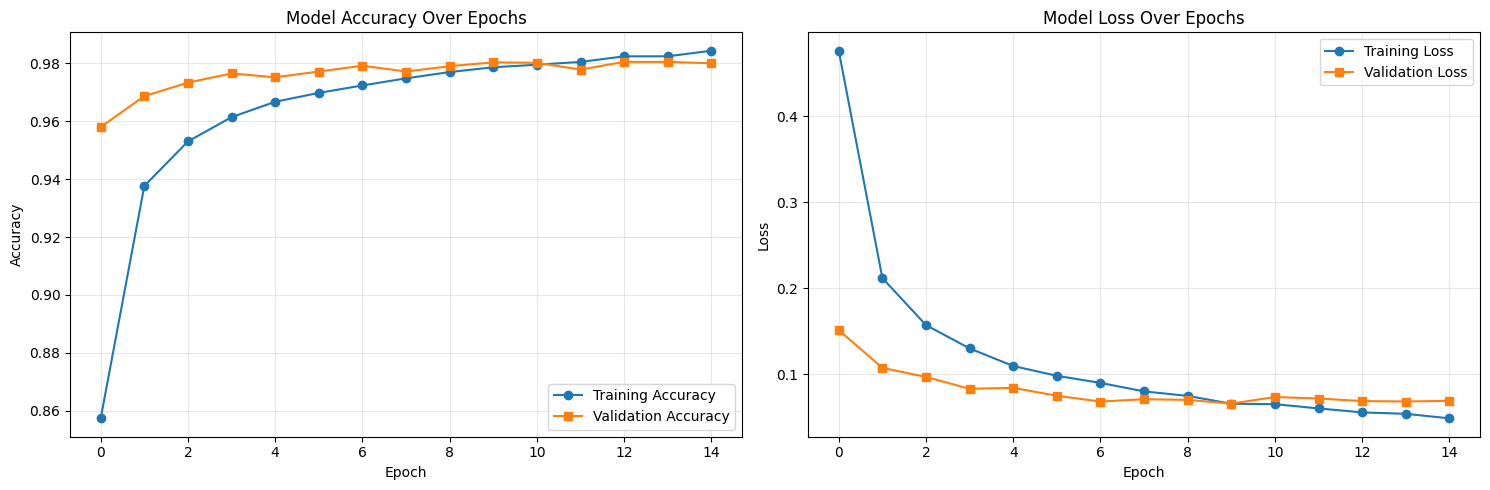

Final Training Accuracy: 0.9844
Final Validation Accuracy: 0.9800
Final Training Loss: 0.0484
Final Validation Loss: 0.0688


In [8]:

# Visualize Training Progress
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
ax1.set_title('Model Accuracy Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training and validation loss
ax2.plot(history.history['loss'], label='Training Loss', marker='o')
ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
ax2.set_title('Model Loss Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display final training metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

In [9]:

# Evaluate Model Performance on Test Data
print("Evaluating model on test data...")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_categorical, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
print("Generating predictions...")
predictions = model.predict(x_test_flat, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate per-class accuracy
class_accuracies = []
for i in range(10):
    class_mask = (y_test == i)
    class_predictions = predicted_classes[class_mask]
    class_accuracy = np.mean(class_predictions == i)
    class_accuracies.append(class_accuracy)
    print(f"Class {i} Accuracy: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

Evaluating model on test data...
Test Accuracy: 0.9804 (98.04%)
Test Loss: 0.0754
Generating predictions...
Class 0 Accuracy: 0.9939 (99.39%)
Class 1 Accuracy: 0.9912 (99.12%)
Class 2 Accuracy: 0.9855 (98.55%)
Class 3 Accuracy: 0.9822 (98.22%)
Class 4 Accuracy: 0.9857 (98.57%)
Class 5 Accuracy: 0.9709 (97.09%)
Class 6 Accuracy: 0.9802 (98.02%)
Class 7 Accuracy: 0.9718 (97.18%)
Class 8 Accuracy: 0.9743 (97.43%)
Class 9 Accuracy: 0.9663 (96.63%)


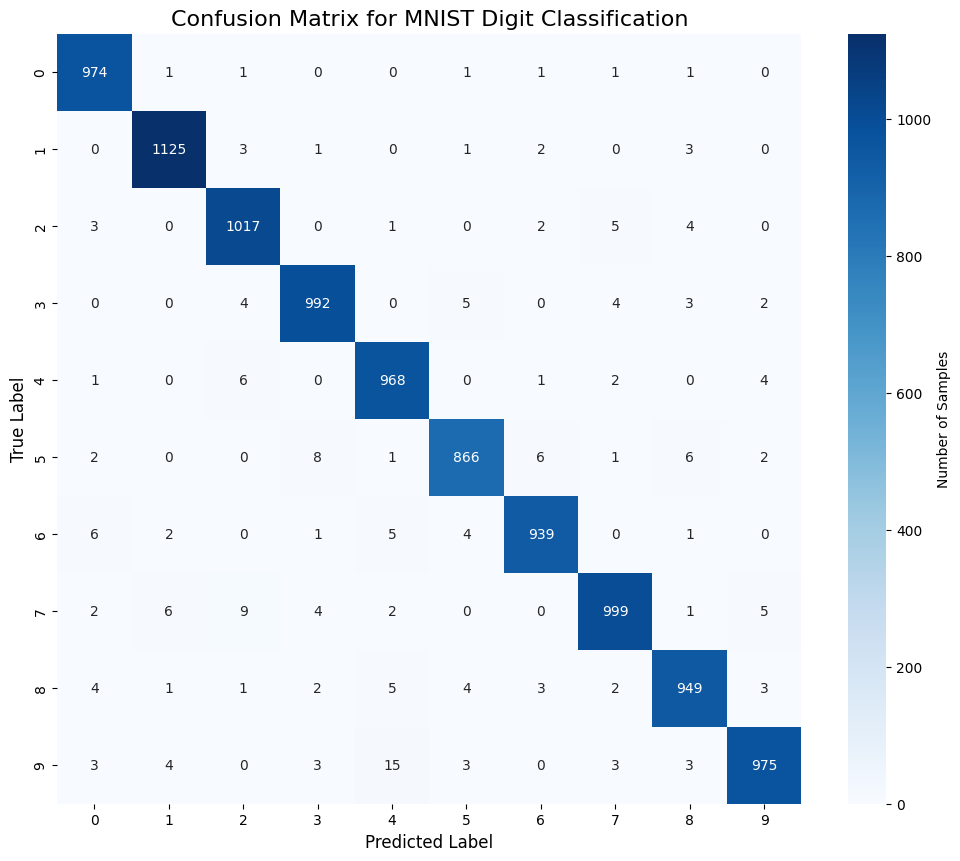


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [11]:

# Create and Display Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix for MNIST Digit Classification', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# Calculate and display classification metrics
print("\nDetailed Classification Report:")
print(classification_report(y_test, predicted_classes, target_names=[str(i) for i in range(10)]))

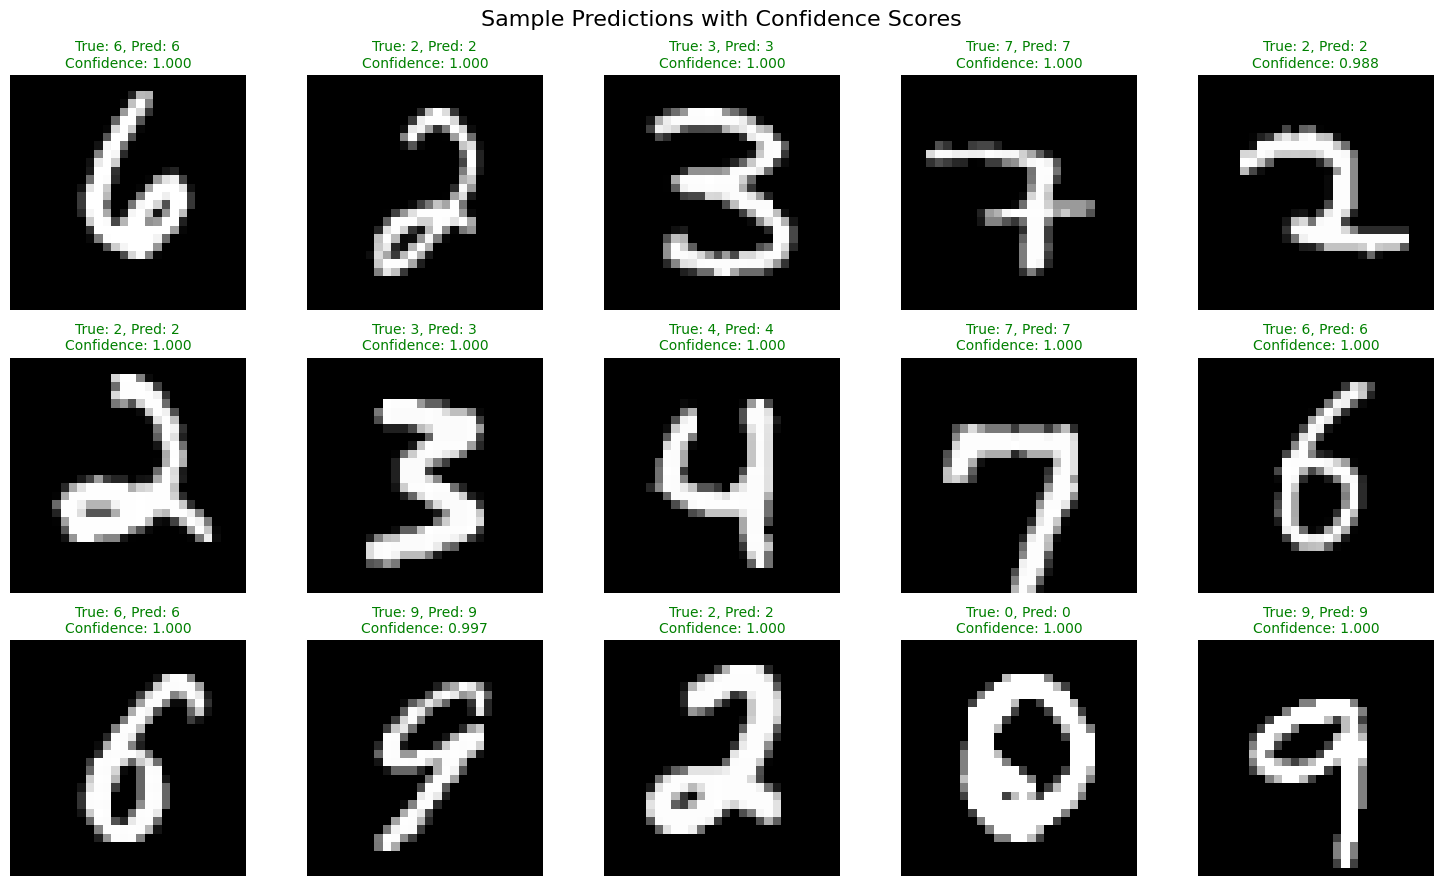

In [12]:

# Display Sample Predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Sample Predictions with Confidence Scores', fontsize=16)

# Select random samples for visualization
sample_indices = np.random.choice(len(x_test), 15, replace=False)

for idx, sample_idx in enumerate(sample_indices):
    row = idx // 5
    col = idx % 5

    # Get the image and prediction
    image = x_test[sample_idx]
    true_label = y_test[sample_idx]
    predicted_label = predicted_classes[sample_idx]
    confidence = predictions[sample_idx][predicted_label]

    # Display the image
    axes[row, col].imshow(image, cmap='gray')

    # Set title with prediction info
    color = 'green' if true_label == predicted_label else 'red'
    axes[row, col].set_title(
        f'True: {true_label}, Pred: {predicted_label}\nConfidence: {confidence:.3f}',
        color=color, fontsize=10
    )
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Total misclassified examples: 196
Error rate: 1.96%


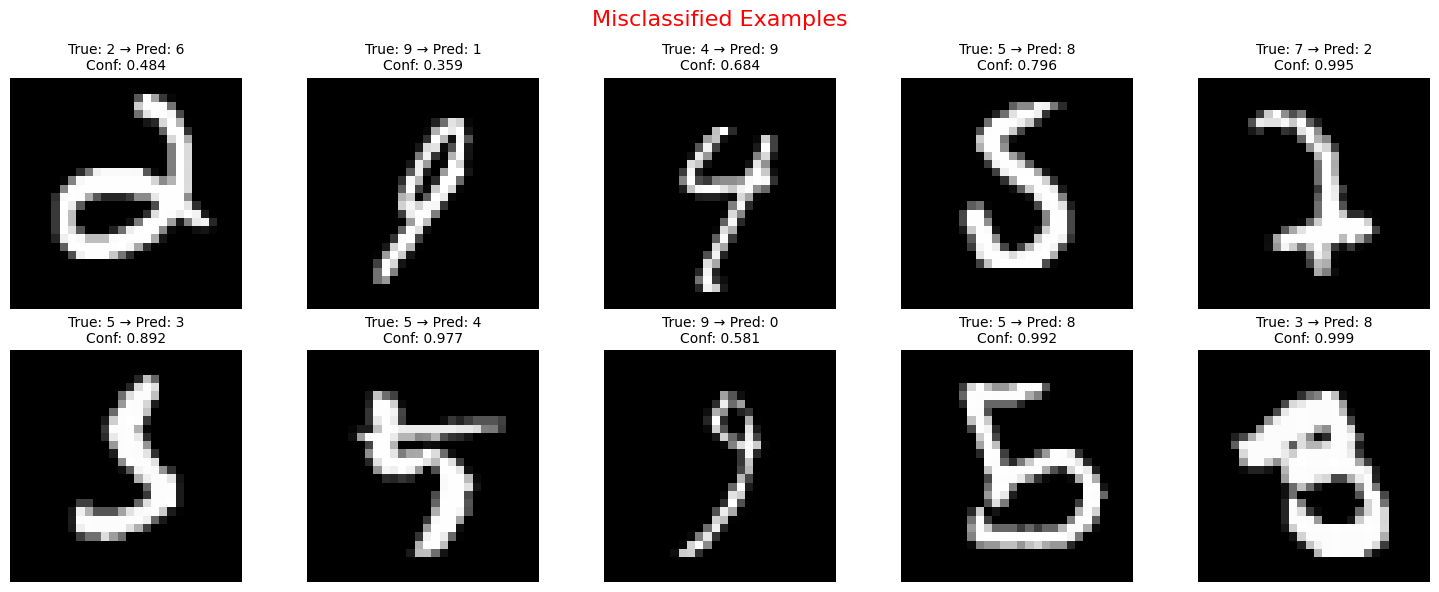

In [13]:

# Error Analysis - Find and Display Misclassified Examples
misclassified_indices = np.where(y_test != predicted_classes)[0]
print(f"Total misclassified examples: {len(misclassified_indices)}")
print(f"Error rate: {len(misclassified_indices)/len(y_test)*100:.2f}%")

# Display some misclassified examples
if len(misclassified_indices) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Misclassified Examples', fontsize=16, color='red')

    sample_errors = np.random.choice(misclassified_indices, min(10, len(misclassified_indices)), replace=False)

    for idx, error_idx in enumerate(sample_errors):
        row = idx // 5
        col = idx % 5

        image = x_test[error_idx]
        true_label = y_test[error_idx]
        predicted_label = predicted_classes[error_idx]
        confidence = predictions[error_idx][predicted_label]

        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(
            f'True: {true_label} → Pred: {predicted_label}\nConf: {confidence:.3f}',
            fontsize=10
        )
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()